### Product Sales Analysis



#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

In [2]:
path ='D:/Subhradeep/Dataset/DC/SalesData/'
files = os.listdir(path)
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
data = pd.DataFrame()

for file in files:
    current_file = pd.read_csv(path +'/'+file)
    data = pd.concat([data,current_file])
    
data.to_csv('data_copy.csv',index=False)

In [4]:
df = pd.read_csv('data_copy.csv')

In [5]:
df.shape

(186850, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Data preprocessing : 
    
    We can see entire row is empty, there is no point in keeping the row when it is empty,so as part of the Data Preprocessing:
    
    a. Drop Null rows
    b. Correct the data type for the column
    c. Seperate Month and Date in a seperate column
    d. Extract City from the address field
    e. Miscellaneous
    



### Null Values in the dataset

In [8]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.dropna(how='all')

In [11]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Extract Column Containing text data:
    
    I tried to convert Quantity ordered to numeric but it failed for conversion so we will try to find and remove the text field. Quantity and Ordered Date are two column which should not contain text data as value



In [12]:
#Finding columns containing text field

df[df['Quantity Ordered'].str.len()>5]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Clearly there are text field and 355 rows which contains text. These are junks which we can discard. Now we will drop these values and then will convert the object to numeric

### Dropping the Junk Values

In [13]:
df = df[df['Quantity Ordered'].str[0:2]!='Qu']
df.shape

(185950, 6)

### Correcting Data Type

In [14]:
#df['Order ID'] = pd.to_numeric(df['Order ID'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.index_col ='Order Date'

### Extract Year,Month,Date,Time and Minute Column

In [15]:
df['Month'] = df['Order Date'].dt.month
df['Date'] = df['Order Date'].dt.day
#df['Year'] = df['Order Date'].dt.year
df['Hour'] = df['Order Date'].dt.hour
#df['Minute'] = df['Order Date'].dt.minute

### Extract City Column from the address field

In [16]:
#df['City']  = str(df['Purchase Address']).split(',')[1].strip(' ')
#df['State'] = str(df['Purchase Address']).split(',')[2].strip(' ')[0:2]

def city(address):
    return address.split(',')[1].strip(' ')

def state(address):
    return address.split(',')[2].strip(' ')[0:2]

df['City']  = df['Purchase Address'].apply(lambda x: f"{city(x)}")
df['State'] = df['Purchase Address'].apply(lambda x: f"{state(x)}")


### Top 5 of the dataset

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Date,Hour,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,8,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,22,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,14,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,14,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,9,Los Angeles,CA


### Product with most unit sales 

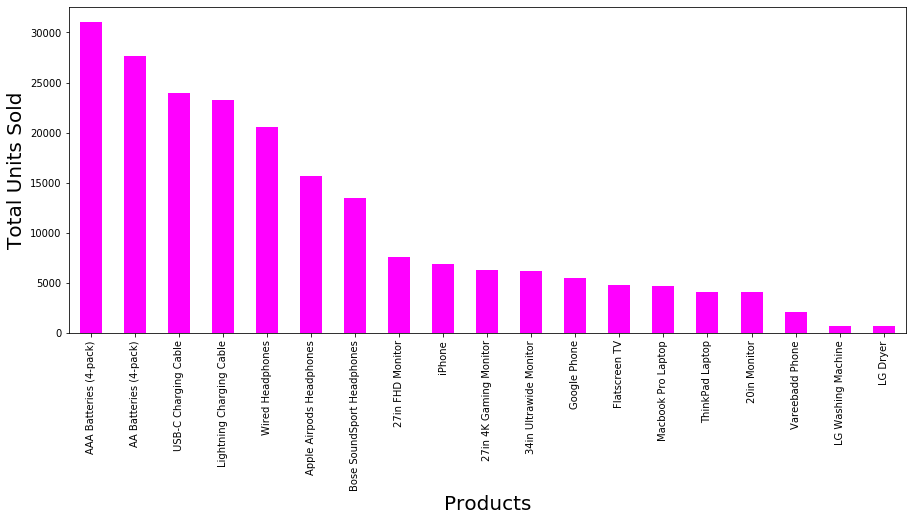

In [18]:
plt.figure(figsize=(15,6))
df.groupby("Product").sum()['Quantity Ordered'].sort_values(ascending=False).plot(kind='bar',color='magenta')
plt.xlabel('Products',fontsize=20)
plt.ylabel('Total Units Sold',fontsize=20)
plt.show()


### Which product generated most revenue ?


<Figure size 1080x576 with 0 Axes>

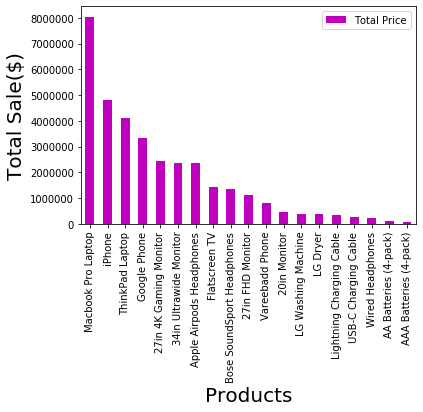

In [19]:
#df[df.loc[:,'Product']=='Macbook Pro Laptop'].sum()['Quantity Ordered']

df['Total Price'] = df['Quantity Ordered'] * df['Price Each'] 
#df.groupby("Product").sum().sort_values("Total Price", ascending=False).head(10)
df_product = df[['Product','Total Price']]
df_product = df_product.groupby('Product').sum().sort_values('Total Price',ascending=False)

plt.figure(figsize=(15,8))
df_product.plot(kind='bar',color='m')
plt.xlabel('Products',fontsize=20)
plt.ylabel('Total Sale($)',fontsize=20)
plt.show()



<b>Observation:</b>
    
    Even though AAA-batteries(4 pack) sold the most in terms of unit. But Macbook pro and iphone generated the most revenue since the unit price of these items is higher than the other items.



### Region wise Sale:

        Let's find out region wise revenue generated.
    
    

<Figure size 1080x576 with 0 Axes>

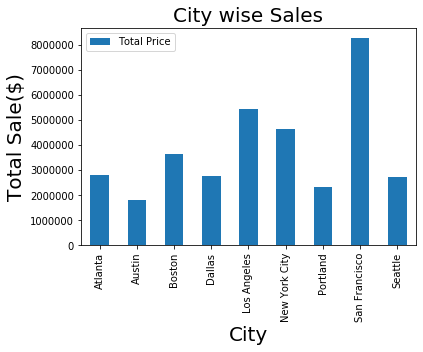

In [20]:
plt.figure(figsize=(15,8))
df_region = df[['Total Price','City']]
df_region.groupby('City').sum().plot(kind='bar')
plt.title('City wise Sales',fontsize=20)
plt.xlabel('City',fontsize=20)
plt.ylabel('Total Sale($)',fontsize=20)
plt.show()


<b> Observation:</b>
    
    San Francisco, followed by Los Angeles and New York City has the most number of Sales revenue generated.

### Region v/s Products sale

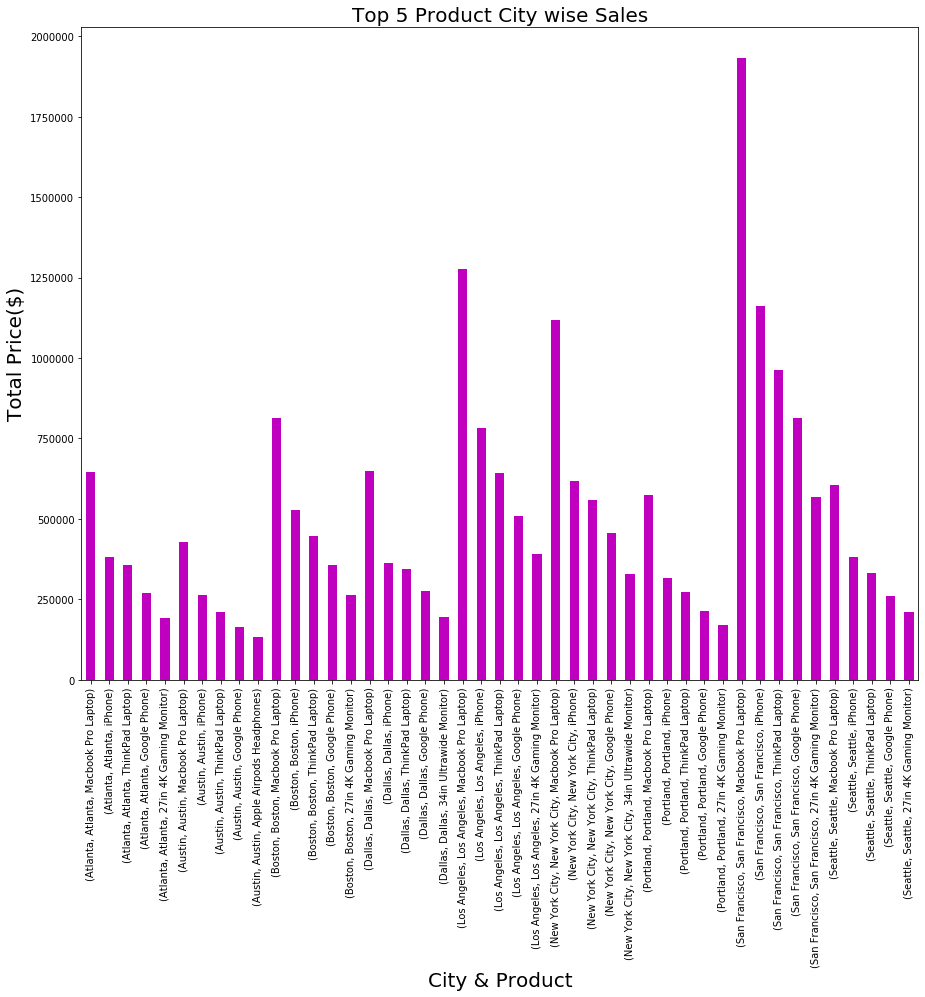

In [21]:
df_region_product = df[['Product','City']]

group = df.groupby(["City","Product"]).sum()
total_price = group["Total Price"].groupby(by='City')

plt.figure(figsize=(15,12))
prod_sales = total_price.nlargest(5)
ax = prod_sales.plot(kind="bar",color='m')
plt.title('Top 5 Product City wise Sales',fontsize=20)
plt.xlabel('City & Product',fontsize=20)
plt.ylabel('Total Price($)',fontsize=20)
plt.show()


Observation :
    
    SanFransisco has the most number of Mackbook pro Laptop sales

### Top Month for Sales 

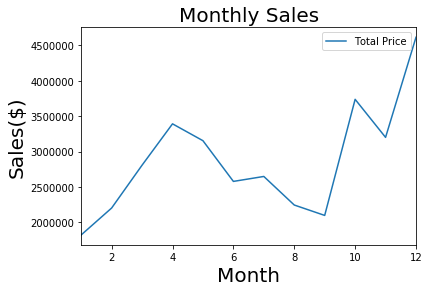

In [22]:

df_month_sales = df[['Month','Total Price']]
df_month_sales.groupby(['Month']).sum().plot()
plt.title('Monthly Sales',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Sales($)',fontsize=20)
plt.show()


Observation:
    
    There is a clear trend of seasonality. The sales is high during the year end whereas decreases during mid year.

### Hourly Sale of the Product

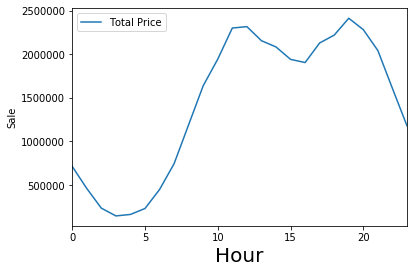

In [23]:
df_hourly_sales = df[['Hour','Total Price']]
df_hourly_sales.groupby(['Hour']).sum().plot()
plt.ylabel('Sale')
plt.xlabel('Hour',fontsize=20)
plt.show()

Observation:
    
    Peak sale time is at around 11:00 AM to 1:00 PM and then drops and picks up again at 4:00 PM till 7:00 PM but gradually decreases from here on.

### Day Of the Month Sale Trend

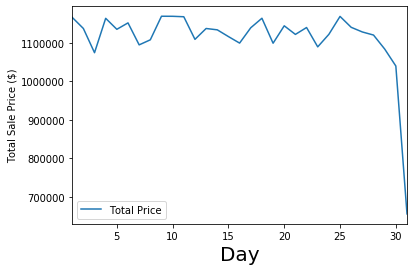

In [24]:
df_month_sales = df[['Date','Total Price']]
df_month_sales.groupby(['Date']).sum().plot()
plt.xlabel('Day',fontsize=20)
plt.ylabel('Total Sale Price ($)')
#plt.legend(loc='upper left')
plt.show()


Observation: 
    
    
    Sales during the month end comes down significntly.